# Assignment: Linear Regression
### Bianca Caissotti di Chiusano
In this assignment you will implement Linear Regression for a very simple test case. Please fill into the marked places of the code
  
  (1) the cost function
  (2) the update function for Gradient Descent

Pieces of code that need to be updated are marked with "HERE YOU ..."

This assignment is kept very simple on purpose to help you familiarize with Linear Regression and its implementation using python (Jupyter notebooks). Feel free to make some useful tests such as, but not limited to:
- What happens if the learning rate is too high or too low?
- Can Linear Regression really find the absolute global minimum?
- What effect does it have if you change the initial guess for the gradient descent to something completely off?
- What happens if you are not updating thet0 and thet1 "simultaneously" but you are updating both parameters in separate for loops (see below)?
- You can try to turn this code for Linear Regression into an implementation of Logistic Regression

## Import the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Function to calculate the Gradient descent
You may find helpful the use of cost (one of the costFunction output parameters) to debug this method
Hint: print("Iteration %d | Cost: %f" % (i, cost))

Using the gradient Descent to find the best fitting line, given the data, in a certain number of iterations

For the gradient Descent we use the loss from the cost function previously implemented
At each iteration we update theta 

In [44]:
def gradientDescent(x, y, theta, alpha, m, maxsteps):
    # HERE YOU HAVE TO IMPLEMENT THE UPDATE OF THE PARAMETERS
    # maxsteps = number of iterations that the algorithm is running
    thetaHist=np.empty([maxsteps, 2])
    #xTrans = x.transpose()
    for i in range(0, maxsteps):
        cost, loss = costFunction(x, y, theta)
        #print("Iteration %d | Cost: %f" % (i, cost))
        theta[0] = theta[0] - (alpha/m)*sum(loss)
        theta[1] = theta[1] - (alpha/m)*sum(np.multiply(x[:,1], loss))
        thetaHist[i] = theta
    return theta, thetaHist

The same is done for this other gradient Descent function. 
The implementation below follows the equations described in the book of "Artificial Intelligence, A modern approach" Chapter 18.6 which I found more intuitive and step by step explanations. Below I plotted both solutions from the two functions. 

In [32]:
def gradientDescentBook(x, y, theta, alpha, m, maxsteps):
    new_x = x[:,1]
    for i in range(0, maxsteps):
        hw = theta[1]*new_x + theta[0]
        derW1 = -(2/m)*sum(new_x*(y-hw))
        derW0 = -(2/m)*sum(y-hw)
        theta[1] = theta[1] - alpha*derW1
        theta[0] = theta[0] - alpha*derW0
    return theta

## Function to calcultate the cost function
The cost function template is returning two parameters, loss and cost. We proposed these two paremeters to facilitate the implementation having not only the cost but also the difference between y and the prediction directly (loss).

In [4]:
def costFunction(x, y, theta):
    # HERE YOU HAVE TO IMPLEMENT THE COST FUNCTION
    loss = np.dot(x, theta) - y
    #print(loss)
    cost = (1/(2*m)) * sum(loss ** 2)
    return cost, loss

## Define some training data
To test your algorithm it is a good idea to start with very simple test data where you know the right answer. So let's put all data points on a line first. Variables x and y represent a (very simple) training set (a dataset with 9 instances). Feel free to play with this test data or use a more realistic one.

$NOTE:$ The column with 1’s included in the variable x is used to facilitate the calculations in the Gradient Descent function (do you remember the x<sub>0</sub> to use the matrix form? If not, revise the lecture).

In [5]:
# This is our data/observations
x=np.array([[1, 0], [1, 0.5], [1, 1], [1, 1.5], [1, 2], [1, 2.5], [1, 3], [1, 4], [1, 5]])
y=np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

## Calculate length of training set


In [36]:
m, n = np.shape(x)

## Plot training set


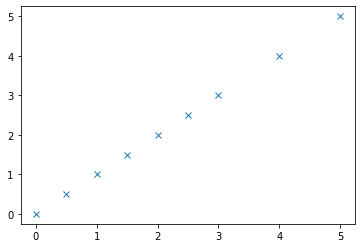

In [7]:
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x[:,1], y, 'x')

## Cost function
Also it is useful for simple test cases to not just run an optimization but first to do a systematic search. So let us first calculate the values of the cost function for different parameters theta


In [8]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)
J = np.empty((len(theta0), len(theta1)))

# Calculate values of the cost function
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        # HERE YOU HAVE TO ADD THE COST FUNCTION FROM THE LECTURE
        theta = [theta0[i],  theta1[j]]
        #print(theta)
        cost, loss = costFunction(x, y, theta)
        J[i, j] = cost

## Visualize the cost function
Let us do some test plots to see the cost function J and to analyze how it depends on the parameters theta0 and theta1


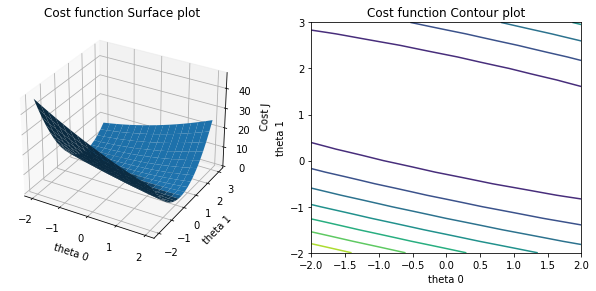

In [9]:
theta0, theta1 = np.meshgrid(theta0, theta1)
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0, theta1, np.transpose(J))
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

## Gradient descent implementation
Here we implement Gradient Descent


In [45]:
alpha = 0.05        # learning parameter
maxsteps= 1000     # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]
#new_x = x[:,1]
#print(new_x)
#new_x[3]
thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)

## Print found optimal values



In [16]:
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])

Optimized Theta0 is  3.9852928379029545e-07
Optimized Theta1 is  0.9999998725702243


## Visualization of the solution
Now let's plot the found solutions of the Gradient Descent algorithms on the contour plot of our cost function to see how it approaches the desired minimum.


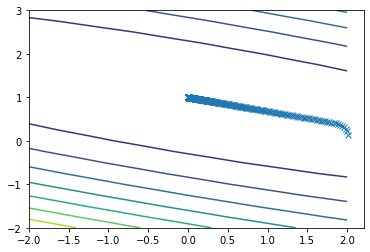

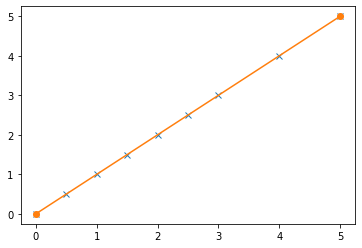

In [14]:
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

## Plotting the solution using the second gradient descent function

The second plot is just the hypothesis function, and we are using the gradient descent method from the book. I found that with 1000 operations its also giving pretty good results, however it was learning slower. With 10000 iterations we get similar results as the first gradient function (that is using 1000 iterations). 

Optimized Theta0 is  3.3169014582043486e-16
Optimized Theta1 is  0.9999999999999999


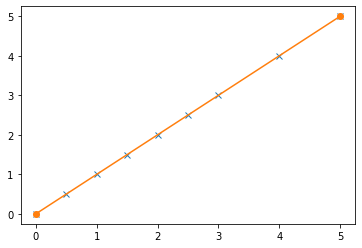

In [35]:
alpha = 0.05        # learning parameter
maxsteps= 10000     # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]
thet = gradientDescentBook(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

# Some experiments

### What happens if the learning rate is too high or too low?

Optimized Theta0 is  -6.261272570345227e+123
Optimized Theta1 is  -1.9581769321561998e+124


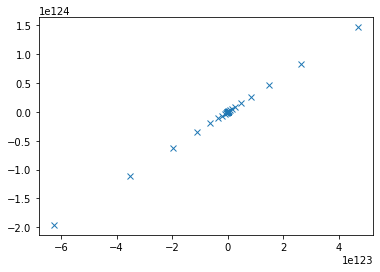

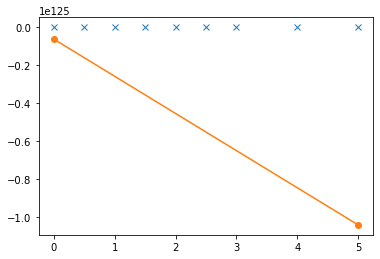

In [27]:
alpha = 0.3        # learning parameter
maxsteps= 1000     # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]
thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

^ If the learning rate is too high it could be that we miss the minima 

Optimized Theta0 is  2.0
Optimized Theta1 is  0.0


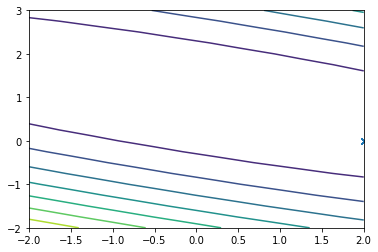

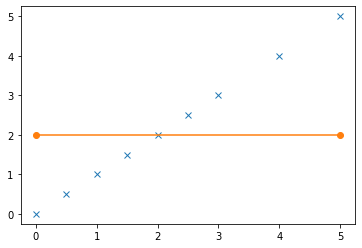

In [18]:
alpha = 0.00        # learning parameter
maxsteps= 1000     # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]
thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

^If the learning rate is 0, then it is not learning, nothing happens, theta stayed the same as our initial predictions

Optimized Theta0 is  1.5477960951362328
Optimized Theta1 is  0.5049453040467821


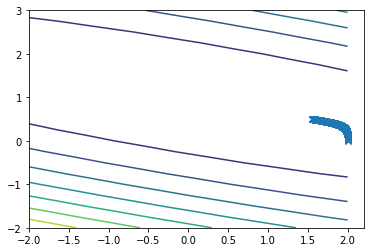

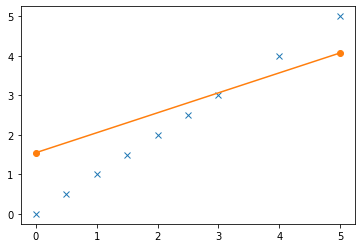

In [20]:
alpha = 0.001        # learning parameter
maxsteps= 1000     # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [2, 0]
thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

If the learning rate is too low, the convergence will also be slow, thus more iterations are needed in the gradient descent.

### What effect does it have if you change the initial guess for the gradient descent to something completely off?

### Starting with negative theta 0

Optimized Theta0 is  -4.6046256401700203e-07
Optimized Theta1 is  1.000000147232948


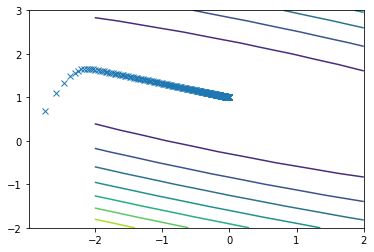

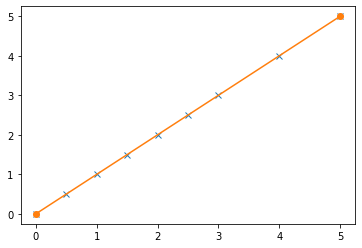

In [25]:
alpha = 0.05        # learning parameter
maxsteps= 1000     # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [-3, 0]
thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

### Doing 10 iterations instead of 1000

Optimized Theta0 is  -2.0870517053706843
Optimized Theta1 is  1.6530828768227013


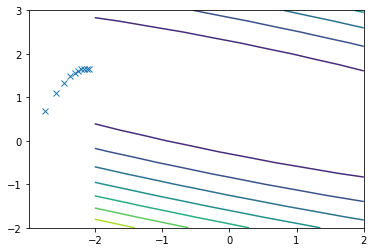

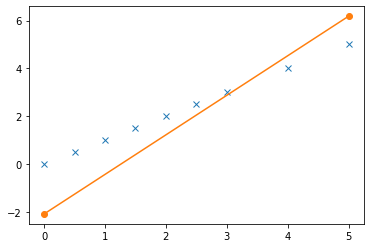

In [26]:
alpha = 0.05        # learning parameter
maxsteps= 10     # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [-3, 0]
thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()

^ Too little iterations, does not converge

### Starting from far off theta predictions

Optimized Theta0 is  2.2728023969017502e-05
Optimized Theta1 is  0.9999927327122121


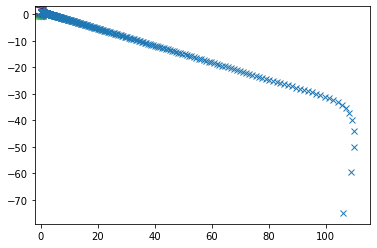

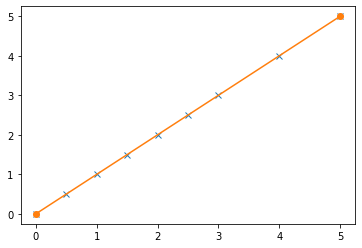

In [29]:
alpha = 0.05        # learning parameter
maxsteps= 1000     # number of iterations that the algorithm is running

# First estimates for our parameters
thet = [100, -100]
thet, thetaHist = gradientDescent(x, y, thet, alpha, m, maxsteps)
print("Optimized Theta0 is ", thet[0])
print("Optimized Theta1 is ", thet[1])
fig3 = plt.figure(3)
plt.contour(theta0, theta1, np.transpose(J))
plt.plot(thetaHist[:,0], thetaHist[:,1], 'x')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')

# Finally, let's plot the hypothesis function into our data
xs = np.array([x[0,1], x[x.shape[0]-1,1]])
h = np.array([[thet[1] * xs[0] + thet[0]], [thet[1] * xs[1] + thet[0]]])
plt.figure(1)
plt.plot(x[:,1], y, 'x')  # Data
plt.plot(xs, h, '-o')     # hypothesis function
plt.show()